# PROJECT: DOGS RATING ANALYSIS

## Tables of Contents
<ul> 
<li><a href=#introduction> INTRODUCTION </a>
    <ul>
    <li><a href=#ques>Analysis questions</a></li>
    </ul></li>
<li><a href=#wrangle> DATA WRANGLING </a>
    <ul>
    <li><a href=#wrangle_intro>Introduction to data Wrangling</a></li>
    <li><a href=#gather>Gather data</a></li>
    <li><a href=#assess>Assess data</a></li>
    <li><a href=#clean>Clean data</a></li>
    </ul> 
</li> 
<li><a href=#analyze> EXPLORATORY DATA ANALYSIS</a> </li>
<li><a href=#concl> CONCLUSION</a></li>
<li><a href=#lim> LIMITATIONS</a></li>
</ul>

<a id='intro'></a> 
## INTRODUCTION

The project is about the analysis of data in a Twitter account by the user name @dog_rate. It is also known as WeRateDogs. On the account, several people rate dogs and provide comments on them. The rating has a denominator of 10 with a denominator of a number more than 10. 

In this project, we have been provided with two data sets, *twitter_archive_enhanced.csv* and *image_predictions.tsv* data. The first data contains tweet details except for the favorite counts and the retweet counts. This data is provided and extracted manually. The  *image_predictions* data contains the details of dog images. A link to this data is provided and has to be extracted programmatically. Since the data from twitter_archive may have retweets and original tweets, we will be using the tweet_ids from the image-prediction data to filter our data so that we analyze the original tweets because the images are from original tweets.

The information contained in the two data sets is not enough to make informed insights on dog ratings, as such, we will gather a third data set WeRateDogs Twitter account using the Twitter API. We will use the tweet_ids from the twitter_archive data to extract data from Twitter API. We wish to get more information on the tweet's fevourite counts and retweets. 

<a id='ques'></a> 
## Analysis questions
In this project, we seek to answer the following questions
<ol>
<li>Which dogs have the highest and the lowest average rating?</li>
<li>What is the dog ranking based on the average favourite counts and the average number of retweets?</li>
<li>Do the dogs with higher have higher favourite counts and number of retweets?</li> 
<li>What is the effective percentage ranking of the dogs based on the favourite counts, number of retweets and the ratings? Does the ranking based on the effective percentage agree with the other rankings used earlier?  </li>
</ol>        

In [1]:
#magic function to have the graphics included in our notebook
%matplotlib inline


#import a number of libraries to use in the project
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

import requests 
import tweepy
import json




<a id='wrangle'></a>
## DATA WRANGLING

<a id='wrangle_intro'></a>
## Introduction
The data wrangling will include gatheing, assessing and cleaning data. We procceed with data gathering. later, we will assess then clean it. 

<a id='gather'></a>
## Gather data

We have three data sets, first, we begin with the *twitter_achive_enhanced*, then the *aditional data from twitter API* and finally the *image prediction data*.

**I. Data set 1: twitter_achive_data** 
We manually extract the data into the file in the currect directory

In [3]:
#extract data in twitter_achive_enhanced.csv and preview its contents
twitter_archive_data =pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_data.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


**II. Data set 2: Addition data on tweets**

To gather this data, we use the tweeter id's from the *twitter_achive_data* to get the more data on retweets, favourite counts and other informations. In the description of the project, the writer clearly says that he may not have extracted the dog ratings and the digs names well. We will therefore extract the tweet texts which which we will pull out the ratings and the bog names. We will also extract the dates when the tweet was created so that we can filter the data and remain with those that were created in the year 2017 or earlier as instructed.

In [4]:
#We check if the id's are strings or numbers
twitter_archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

The twitter ids twitter_archive_data are integers, hence, we go ahead and use them to extract data from tweeter API using the tweepy library

In [5]:
# We preview the tweeter ids
twitter_ids = list(twitter_archive_data['tweet_id'])
twitter_ids[:5]

[892420643555336193,
 892177421306343426,
 891815181378084864,
 891689557279858688,
 891327558926688256]

Next, we extract data from twitter. Since some id may not work, we create a list of those ids that will not work.


In [ ]:
# we define our keys then pass them through the API authientication handler
consumer_key='xxxx'
consumer_secret_key='xxxx'
access_token ='xxxx'
access_secret_token='xxxx'


auth = tweepy.OAuthHandler(consumer_key, consumer_secret_key)
auth.set_access_token(access_token, access_secret_token)

api=tweepy.API(auth, wait_on_rate_limit=True)

tweet_id_not_fetch={}
counter=0
#we get the tweet details line by line and create a JSON line, then write it line by line into the text file on our local directpry
#'additional_tweet_data.txt' 
with open('tweet._json.txt','w') as file:
    for an_id in twitter_ids:
        try:
            tweet=api.get_status(an_id,tweet_mode='extended')
            json.dump(tweet._json, file)
            file.write('\n')
            counter+=1
        except tweepy.errors.TweepyException as error:
            tweet_id_not_fetch[an_id]=error
            pass
print(tweet_id_not_fetch)
 
   
        

In [6]:
#see the overview of the data in the text file. We use break to read one line only and understand its structure
# To achieve it, we convert the line into a json line, make a dictonary and see the keys and the values
with open('tweet._json.txt', mode='r', encoding='utf-8') as file:
    for line in file:
        line_dict=dict(json.loads(line))
        print(line_dict.keys())
        break

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])


In [7]:
#Check important information to get from the tweet._json.text document.
# show the key and values in the line dictionary
for key,value in line_dict.items():
    print('key:, {} :::::: value:{}'.format(key,value))

key:, created_at :::::: value:Tue Aug 01 16:23:56 +0000 2017
key:, id :::::: value:892420643555336193
key:, id_str :::::: value:892420643555336193
key:, full_text :::::: value:This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
key:, truncated :::::: value:False
key:, display_text_range :::::: value:[0, 85]
key:, entities :::::: value:{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528,

In [8]:
#Create a list of dictionaries with the required information then use it to create a data frame
additional_data_list=[]
with open('tweet._json.txt', mode='r', encoding='utf-8') as file:
    for line in file:
        line_data=json.loads(line)
        additional_data_list.append({'tweet_id' : line_data['id'],
                                    'date_created' : line_data['created_at'],
                                    'retweet_count' : line_data['retweet_count'],
                                    'favorite_count' : line_data['favorite_count'],
                                    'text':line_data['full_text']})
additional_tweet_data=pd.DataFrame(additional_data_list)

In [9]:
#Preview the data frame created
additional_tweet_data.head()

,tweet_id,date_created,retweet_count,favorite_count,text
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,6973,33700,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,5275,29228,This is Tilly. She's just checking pup on you....
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,3464,21975,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,7192,36794,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,7719,35187,This is Franklin. He would like you to stop ca...


**III. Data set 3: Image prediction data**

We programmatically extract the image prediction data from the link give

In [10]:
#use requests library to collect data from the given link
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

#create a file called image_predictions.tsv in our folder then write the contents of the file in it
with open('image_predictions.tsv','wb') as file:
    file.write(response.content) 
    

**Details of the columns of the image-prediction data**

tweet_id is the last part of the tweet URL after "status/" 
* → https://twitter.com/dog_rates/status/889531135344209921
* p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever
* p1_conf is how confident the algorithm is in its #1 prediction → 95%
* p1_dog is whether or not the #1 prediction is a breed of dog → TRUE
* p2 is the algorithm's second most likely prediction → Labrador retriever
* p2_conf is how confident the algorithm is in its #2 prediction → 1%
* p2_dog is whether or not the #2 prediction is a breed of dog → TRUE

In [11]:
# extract file from the tsv format to a pd DataFrame and preview it
image_predict_data=pd.read_csv('image_predictions.tsv', sep='\t')
image_predict_data.head(2)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


<a id='assess'> </a> 
       
## Assess data
In this section, we will list a number of quality and tidiness issues that we are going to carry out on our data sets. Firs we visually have a look at the data, then later programmatically then single out and note the issues that we are going to clean.

In [12]:
#Preview additional_tweet_data 
additional_tweet_data.head()

,tweet_id,date_created,retweet_count,favorite_count,text
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,6973,33700,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,5275,29228,This is Tilly. She's just checking pup on you....
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,3464,21975,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,7192,36794,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,7719,35187,This is Franklin. He would like you to stop ca...


In [13]:
#Preview twitter_archive_data
twitter_archive_data.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [14]:
#Preview image_predict_dat
image_predict_data.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [15]:
#Preview a line of tweet in the text from the text twitter_archive_data
twitter_archive_data['text'][12]

"Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm"

In [16]:
#Column summaries
twitter_archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [17]:
#Column summaries
additional_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   int64 
 1   date_created    2327 non-null   object
 2   retweet_count   2327 non-null   int64 
 3   favorite_count  2327 non-null   int64 
 4   text            2327 non-null   object
dtypes: int64(3), object(2)
memory usage: 91.0+ KB


In [18]:
#Column summaries
image_predict_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Having used twitter ids from twitter_archive_data to get data from the twitter API and got a new data having tweet text, favourite counts, rating, the number of retweets and the timestamp, it is okay cleaning the new data. Since the ratings and the name of the dogs have to be extracted a fresh as tipped in the description of the project and the these data must have the corresponding favourite counts and number of retweets, its wish working with the new data aquired and the image-prediction data only. To achieve the master data required to do the analysis, it will be necessary to utilize the twitter ids only, from the image-prediction and no other column from that data set. The following are the sets of the issues that we will clean.

### Quality Issues
##### additional_tweet_data
* Convert the data type of the extracted dog rating from string to integer
* Drop rows whose dog ratings have no numeric value(have an empty string)
* Adopt a new name for the dog rating. A name that is going to signify the type of value we have in the column (x0.1)
* Drop rows that goes beyond 2017
* Drop the id, date columns and text column
* Rename the columns of the new data frame formed after combinining the extracted data and the original data
* Clean the dogs name column to ensure that no row has two dog names
* Remove the texts quotation(') texts from the names of the of the dogs extracted


### Tideness Issues
##### additional_tweet_data
* Extract dog ratings from the text column
* Extract dog names ratings from the text column
* Extract years from the timestamp column

##### additional_tweet_data and image_predict_data
* Create one table for the observational unit. We will ensure that the rows in the final data have a tweet id that is in both tables. This is to ensure that we analyse original tweets, that is tweets having images only



 

<a id='clean'></a>
## Clean data
In this section, we make a copy of the data then clean them based on the issues Identified above the save the final data as a *twitter_archive_master.csv*.

In [19]:
#make copies of the copy data
clean_twitter_archive=twitter_archive_data.copy()
clean_image_predict=image_predict_data.copy()
clean_more_tweet_data=additional_tweet_data.copy()

In [20]:
# Preview the columns of each table
clean_twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [21]:
clean_twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [22]:
clean_more_tweet_data.head()

,tweet_id,date_created,retweet_count,favorite_count,text
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,6973,33700,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,5275,29228,This is Tilly. She's just checking pup on you....
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,3464,21975,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,7192,36794,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,7719,35187,This is Franklin. He would like you to stop ca...


In [23]:
clean_more_tweet_data.shape

(2327, 5)

In [24]:
clean_image_predict.shape

(2075, 12)

In [25]:
clean_twitter_archive.shape

(2356, 17)

We check the structure of the tweet so that we can pull out the ratings and the dogs names

**Define**
##### Tideness Issue : additional_tweet_data
* Extract dog ratings from the text column
* Extract dog names ratings from the text column

The two will make a dataframe which will be concatenated to the original data

##### Quality Issue : additional_tweet_data
* Remove the texts quotation(') texts from the names of the of the dogs extracted

**Code**

In [27]:
#preview a line in text column
print(clean_more_tweet_data['text'].values[2])

This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB


In [28]:
#Demonstrate how we can extract ratings using regular expressions
t=re.findall(r'\d{2}.\d{2}', clean_more_tweet_data['text'].values[2])
t

['12/10']

In [29]:
#Extract ratings and dog names from the text column in clean_more_tweet_data 
# create a data frame which we are goining to concatenate along the column with the main data frame
rating_dog_name=[]
for string in clean_more_tweet_data['text'].values:
    rate = str(re.findall(r'\d{2}.\d{2}',string))[2:4]
    dog_n =str(re.findall(r'(doggo|floofer|pupper|puppo)',string))[2:-2]
    rating_dog_name.append({'rating_x0.1':rate, 'dog_name': dog_n})
rating_dog_data=pd.DataFrame(rating_dog_name)

   

**Test**

In [30]:
rating_dog_data.head()  

,rating_x0.1,dog_name
0,13,
1,13,
2,12,
3,13,
4,12,


In [31]:
#view the size of the data
rating_dog_data.shape

(2327, 2)

In [32]:
# Does rating_dog_data has the same number of rows as clean_more_tweet_data? if yes, we concat them
rating_dog_data.shape

(2327, 2)

In [33]:
#Combine the two data sets
clean_new_tweet_data=pd.concat([clean_more_tweet_data,rating_dog_data], axis=1, ignore_index=True)

In [34]:
clean_new_tweet_data.head()

,0,1,2,3,4,5,6
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,6973,33700,This is Phineas. He's a mystical boy. Only eve...,13,
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,5275,29228,This is Tilly. She's just checking pup on you....,13,
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,3464,21975,This is Archie. He is a rare Norwegian Pouncin...,12,
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,7192,36794,This is Darla. She commenced a snooze mid meal...,13,
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,7719,35187,This is Franklin. He would like you to stop ca...,12,


##### Quality issue: additional_tweet_data
**Define**

* Rename the columns of the new data frame formed after combinining the extracted data and the original data
* Adopt a new name for the dog rating. A name that is going to signify the type of value we have in the column (x0.1)

**Code**

In [35]:
#view column names of the clean_more_tweet_data and the new smaller data
clean_more_tweet_data.columns

Index(['tweet_id', 'date_created', 'retweet_count', 'favorite_count', 'text'], dtype='object')

In [36]:
rating_dog_data.columns

Index(['rating_x0.1', 'dog_name'], dtype='object')

In [37]:
clean_new_tweet_data.columns=['tweet_id', 'date_created', 'retweet_count', 'favorite_count', 'text','rating_x0.1','dog_name']


**Test**

In [38]:
clean_new_tweet_data.head()

,tweet_id,date_created,retweet_count,favorite_count,text,rating_x0.1,dog_name
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,6973,33700,This is Phineas. He's a mystical boy. Only eve...,13,
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,5275,29228,This is Tilly. She's just checking pup on you....,13,
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,3464,21975,This is Archie. He is a rare Norwegian Pouncin...,12,
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,7192,36794,This is Darla. She commenced a snooze mid meal...,13,
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,7719,35187,This is Franklin. He would like you to stop ca...,12,


In [39]:
clean_new_tweet_data.tail(8)

,tweet_id,date_created,retweet_count,favorite_count,text,rating_x0.1,dog_name
2319,666055525042405380,Mon Nov 16 00:49:46 +0000 2015,196,367,Here is a Siberian heavily armored polar bear ...,10,
2320,666051853826850816,Mon Nov 16 00:35:11 +0000 2015,699,1023,This is an odd dog. Hard on the outside but lo...,,
2321,666050758794694657,Mon Nov 16 00:30:50 +0000 2015,50,115,This is a truly beautiful English Wilson Staff...,10,
2322,666049248165822465,Mon Nov 16 00:24:50 +0000 2015,36,88,Here we have a 1949 1st generation vulpix. Enj...,,
2323,666044226329800704,Mon Nov 16 00:04:52 +0000 2015,115,246,This is a purebred Piers Morgan. Loves to Netf...,,
2324,666033412701032449,Sun Nov 15 23:21:54 +0000 2015,36,100,Here is a very happy pup. Big fan of well-main...,,
2325,666029285002620928,Sun Nov 15 23:05:30 +0000 2015,39,112,This is a western brown Mitsubishi terrier. Up...,,
2326,666020888022790149,Sun Nov 15 22:32:08 +0000 2015,419,2284,Here we have a Japanese Irish Setter. Lost eye...,,


In [40]:
clean_new_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   int64 
 1   date_created    2327 non-null   object
 2   retweet_count   2327 non-null   int64 
 3   favorite_count  2327 non-null   int64 
 4   text            2327 non-null   object
 5   rating_x0.1     2327 non-null   object
 6   dog_name        2327 non-null   object
dtypes: int64(3), object(4)
memory usage: 127.4+ KB


##### Tidiness: additional_tweet_data

**Define** 

* Extract years from the timestamp column

**Code**

In [41]:
#Pull out years from the timestamp
clean_new_tweet_data['date_created']=clean_new_tweet_data['date_created'].str[-4:]

**Test**

In [42]:

clean_new_tweet_data.head()

,tweet_id,date_created,retweet_count,favorite_count,text,rating_x0.1,dog_name
0,892420643555336193,2017,6973,33700,This is Phineas. He's a mystical boy. Only eve...,13,
1,892177421306343426,2017,5275,29228,This is Tilly. She's just checking pup on you....,13,
2,891815181378084864,2017,3464,21975,This is Archie. He is a rare Norwegian Pouncin...,12,
3,891689557279858688,2017,7192,36794,This is Darla. She commenced a snooze mid meal...,13,
4,891327558926688256,2017,7719,35187,This is Franklin. He would like you to stop ca...,12,


In [43]:
clean_new_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   int64 
 1   date_created    2327 non-null   object
 2   retweet_count   2327 non-null   int64 
 3   favorite_count  2327 non-null   int64 
 4   text            2327 non-null   object
 5   rating_x0.1     2327 non-null   object
 6   dog_name        2327 non-null   object
dtypes: int64(3), object(4)
memory usage: 127.4+ KB


##### Quality issue: additional_tweet_data

**Define**

* Drop rows that goes beyond 2017

**Code**

In [44]:
clean_new_tweet_data['date_created'].value_counts()

2016    1173
2015     689
2017     465
Name: date_created, dtype: int64

In [45]:
#Pick data that was created on 2017 only
clean_new_tweet_data=clean_new_tweet_data[clean_new_tweet_data['date_created']=='2017']

**Test**

In [46]:
clean_new_tweet_data.head()

,tweet_id,date_created,retweet_count,favorite_count,text,rating_x0.1,dog_name
0,892420643555336193,2017,6973,33700,This is Phineas. He's a mystical boy. Only eve...,13,
1,892177421306343426,2017,5275,29228,This is Tilly. She's just checking pup on you....,13,
2,891815181378084864,2017,3464,21975,This is Archie. He is a rare Norwegian Pouncin...,12,
3,891689557279858688,2017,7192,36794,This is Darla. She commenced a snooze mid meal...,13,
4,891327558926688256,2017,7719,35187,This is Franklin. He would like you to stop ca...,12,


In [47]:
clean_new_tweet_data['date_created'].value_counts()

2017    465
Name: date_created, dtype: int64

In [48]:
clean_new_tweet_data.head()

,tweet_id,date_created,retweet_count,favorite_count,text,rating_x0.1,dog_name
0,892420643555336193,2017,6973,33700,This is Phineas. He's a mystical boy. Only eve...,13,
1,892177421306343426,2017,5275,29228,This is Tilly. She's just checking pup on you....,13,
2,891815181378084864,2017,3464,21975,This is Archie. He is a rare Norwegian Pouncin...,12,
3,891689557279858688,2017,7192,36794,This is Darla. She commenced a snooze mid meal...,13,
4,891327558926688256,2017,7719,35187,This is Franklin. He would like you to stop ca...,12,


##### Tidiness issue : additional_tweet_data and image_predict_data
We check if there are tweet ids that are both in the *clean_additional_tweet_data* and the *clean_image_predict_data*. If yes, we pull the ids and filter the databased on the list having duplicated ids

**Define**

* Create one table for the observational unit. We will ensure that the rows in the final data have a tweet id that is in both tables. This is to ensure that we analyse original tweets, that is tweets having images only

**Code**

In [49]:
#Check ids in clean_new_tweet_data  that have a corresponding image in clean image predict data
ids =pd.Series(clean_new_tweet_data['tweet_id']+clean_image_predict['tweet_id'])
sum(ids.duplicated())

1609

In [50]:
#Yes, there are ids in both data sets
#Extract rows ids that have corresponding rows ids in the image predict data
id_with_images=[]
for tweet_id in clean_image_predict['tweet_id'].values:
    if tweet_id in clean_new_tweet_data['tweet_id'].values:
        id_with_images.append(tweet_id)
len(id_with_images)

376

In [51]:
#Extract tweet that have ids in the list id_with_images. That is tweets having images from image prediction data
clean_with_image=clean_new_tweet_data[clean_new_tweet_data['tweet_id'].isin(id_with_images)]


**Test**

In [52]:
clean_with_image.head()

,tweet_id,date_created,retweet_count,favorite_count,text,rating_x0.1,dog_name
0,892420643555336193,2017,6973,33700,This is Phineas. He's a mystical boy. Only eve...,13,
1,892177421306343426,2017,5275,29228,This is Tilly. She's just checking pup on you....,13,
2,891815181378084864,2017,3464,21975,This is Archie. He is a rare Norwegian Pouncin...,12,
3,891689557279858688,2017,7192,36794,This is Darla. She commenced a snooze mid meal...,13,
4,891327558926688256,2017,7719,35187,This is Franklin. He would like you to stop ca...,12,



##### Quality issue: additional_tweet_data
Some colums have two names of the dogs. We delete such rows

**Define**

* Clean the dog_name column to ensure that no row has two dog names

**Code**

In [53]:
#Check the number of dogs
clean_with_image['dog_name'].value_counts()

                  307
doggo              29
pupper             24
puppo              13
puppo', 'doggo      2
floofer             1
Name: dog_name, dtype: int64

In [55]:
clean_with_image=clean_with_image[clean_with_image['dog_name']!="puppo', 'doggo"]

**Test**

In [56]:
clean_with_image['dog_name'].value_counts()

           307
doggo       29
pupper      24
puppo       13
floofer      1
Name: dog_name, dtype: int64

##### Quality issue: additional_tweet_data

**Define**

* Drop rows whose dog ratings have no numeric value(have an empty string)

**Code**

In [57]:
clean_with_image['dog_name'].values[0]

''

In [58]:
type(clean_with_image['dog_name'].values[0])

str

In [59]:
clean_with_image.drop(clean_with_image[clean_with_image['dog_name']==''].index, axis=0, inplace=True)

**Test**

In [60]:
clean_with_image.head()

,tweet_id,date_created,retweet_count,favorite_count,text,rating_x0.1,dog_name
9,890240255349198849,2017,6074,27855,This is Cassie. She is a college pup. Studying...,14,doggo
12,889665388333682689,2017,8305,41884,Here's a puppo that seems to be on the fence a...,13,puppo
14,889531135344209921,2017,1874,13312,This is Stuart. He's sporting his favorite fan...,13,puppo
28,886366144734445568,2017,2613,18489,This is Roscoe. Another pupper fallen victim t...,12,pupper
42,884162670584377345,2017,2493,17889,Meet Yogi. He doesn't have any important dog m...,12,doggo


##### Quality issue: additional_tweet_data

**Define**

* Drop the id, date columns and text column

**Code**

In [61]:
#Drop tweet_id and date_created columns
clean_with_image.drop(columns={'tweet_id','date_created','text'}, inplace=True)

**Test**

In [62]:
clean_with_image

,retweet_count,favorite_count,rating_x0.1,dog_name
9,6074,27855,14,doggo
12,8305,41884,13,puppo
14,1874,13312,13,puppo
28,2613,18489,12,pupper
42,2493,17889,12,doggo
...,...,...,...,...
442,2513,10196,13,doggo
447,7834,0,13,pupper
451,4371,0,12,puppo
459,942,4679,11,doggo


##### Quality issue: additional_tweet_data

**Define**

* Convert the data type of the extracted dog rating from string to integer

**Code**

In [63]:
clean_with_image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 9 to 460
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   retweet_count   67 non-null     int64 
 1   favorite_count  67 non-null     int64 
 2   rating_x0.1     67 non-null     object
 3   dog_name        67 non-null     object
dtypes: int64(2), object(2)
memory usage: 2.6+ KB


In [64]:
#Change the data type of rating_x0.1 from string to integer
clean_with_image['rating_x0.1']=clean_with_image['rating_x0.1'].astype(int)

In [65]:
clean_with_image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 9 to 460
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   retweet_count   67 non-null     int64 
 1   favorite_count  67 non-null     int64 
 2   rating_x0.1     67 non-null     int32 
 3   dog_name        67 non-null     object
dtypes: int32(1), int64(2), object(1)
memory usage: 2.4+ KB


**We then save data to csv**

In [66]:
clean_with_image.to_csv('twitter_archive_master.csv', index=False)

<a id='analyze'></a>
## EXPLORATORY DATA ANALYSIS

In this section, we check for outliers, remove them then analyse the data

In [67]:
#Load the master data
twitter_master_data=pd.read_csv('twitter_archive_master.csv')

In [68]:
#have an overview of the data
twitter_master_data.head()

,retweet_count,favorite_count,rating_x0.1,dog_name
0,6074,27855,14,doggo
1,8305,41884,13,puppo
2,1874,13312,13,puppo
3,2613,18489,12,pupper
4,2493,17889,12,doggo


In [69]:
twitter_master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   retweet_count   67 non-null     int64 
 1   favorite_count  67 non-null     int64 
 2   rating_x0.1     67 non-null     int64 
 3   dog_name        67 non-null     object
dtypes: int64(3), object(1)
memory usage: 2.2+ KB


#### Research question 1: Which dogs have the highest and the lowest average rating?

In [74]:
means_ratings=twitter_master_data.groupby('dog_name')['rating_x0.1'].mean()
means_ratings

dog_name
doggo      12.448276
floofer    13.000000
pupper     12.625000
puppo      12.769231
Name: rating_x0.1, dtype: float64

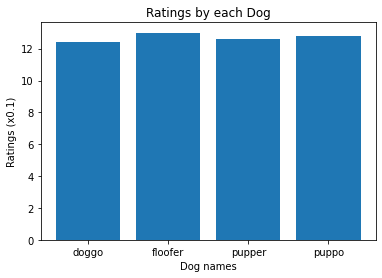

In [81]:
#def bars(means_ratings.columns, means_ratings)

plt.bar(['doggo','floofer','pupper','puppo'],means_ratings)
plt.title("Ratings by each Dog")
plt.xlabel("Dog names")
plt.ylabel("Ratings (x0.1)");

In [83]:
twitter_master_data['dog_name'].value_counts()

doggo      29
pupper     24
puppo      13
floofer     1
Name: dog_name, dtype: int64

Floofer has the highest dog rating followed by puppo while Doggo has the lowest. However, the difference is very minimial. It is worthy noting that floofer was rated only once, hence, the values represents that of one rateing. It is therefore better put that puppo has the best rating since it has a number of appearences in the tweets than floofer.


#### Research question 2: What are the dog ranking based on the average favourite counts and the average number of retweets?
We make a table having a number of values whose columns are dog names and exntries are the ratings

In [165]:
means_ratings=twitter_master_data.groupby('dog_name')['retweet_count','favorite_count'].mean()
means_ratings

C:\Users\Fidelis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,retweet_count,favorite_count
dog_name,,
doggo,3497.793103,14864.551724
floofer,3061.000000,19881.000000
pupper,6334.708333,22379.000000
puppo,7765.230769,29184.230769


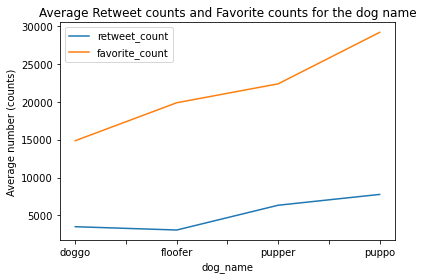

In [175]:
pl=means_ratings.plot(kind='line', title='Average Retweet counts and Favorite counts for the dog name');
pl.set_ylabel('Average number (counts)');

Based on the retweet_counts and the favorite_counts, **puppo** was rated highly while **doggo** was rated the lowest

#### Research question 3: Do the dogs with higher have higher favourite counts and number of retweets?

In [176]:
means_ratings=twitter_master_data.groupby('dog_name')['retweet_count','favorite_count'].mean()
means_ratings

C:\Users\Fidelis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,retweet_count,favorite_count
dog_name,,
doggo,3497.793103,14864.551724
floofer,3061.000000,19881.000000
pupper,6334.708333,22379.000000
puppo,7765.230769,29184.230769


Based on our earlier analysis, the dog with the highest rating was Puppo. From the table and the line graph above, the retweet_counts and favorite_counts are much higher for Puppo than other files. This implies that the dog with the highest rating has the highest average favourite counts and retweet_ counts.

Likewise, the dog with the lowest rating, doggo has the lowest rating. Likewise, its retweet_count and favorite_count are relatively lower than other dogs

#### Research question 4: What is the effective percentage ranking of the dogs based on the favourite counts, number of retweets and the ratings? Does the ranking based on the effective percentage agree with the other rankings used earlier

We computer the percentage of every entity for a given dog then combine using average as shown below.

In [179]:
effective_ratings=twitter_master_data.groupby('dog_name')['retweet_count','favorite_count','rating_x0.1'].mean()

C:\Users\Fidelis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [180]:
effective_ratings

,retweet_count,favorite_count,rating_x0.1
dog_name,,,
doggo,3497.793103,14864.551724,12.448276
floofer,3061.000000,19881.000000,13.000000
pupper,6334.708333,22379.000000,12.625000
puppo,7765.230769,29184.230769,12.769231


In [185]:
sum_counts=list(effective_ratings.sum(axis=0))
sum_counts

[20658.732206012377, 86308.7824933687, 50.84250663129974]

In [195]:
effective_ratings['retweet_count']=effective_ratings['retweet_count']*100/sum_counts[0]
effective_ratings['favorite_count']=effective_ratings['favorite_count']*100/sum_counts[1]
effective_ratings['rating_x0.1']=effective_ratings['rating_x0.1']*100/sum_counts[2]
effective_ratings['Effective_percentage']=effective_rate_copy.mean(axis=1)
effective_ratings

,retweet_count,favorite_count,rating_x0.1,Effective_percentage
dog_name,,,,
doggo,16.931306,17.222525,24.483993,19.545941
floofer,14.816979,23.034736,25.569156,21.140290
pupper,30.663587,25.928995,24.831585,27.141389
puppo,37.588128,33.813744,25.115266,32.172379


Based on the effective_percentage, we get that the puppo has the highest ranking while doggo has the lowest ranking. This is in agreement with rankings that we cam up with earlier.

<a id='concl'></a>
## CONCLUSION
In this project, we have ranked the dogs based on the data given together with the data that we gathered from the twitter API. We have found that Puppo is the most highly ranked dog name followed by pupper and doggo is the least ranked one. We were not able to get a better rank for floofer because we had limited data to understand help us rank it. it only have one value.

We have also found that the dog names with higher ranking had more average favorite counts and retweet counts compared to others. On the other hand, the dog name with the lowest ranking had fewer average favorite counts and retweet counts compared to others. 

Finally, we have come up with a metric that combines the ranking, the favourite countd and the retweet counts. The new metric gave us results that were in agreement with the rankings of the dogs as done with ealier metrics. 

<a id='lim'></a>
## LIMITATIONS

The main limitation is that the scope of the data was limited to 2017 or later and most rows had no dog ratings. As such, we had very few data rows at the end of the cleaning. For instance, the floofer dog had one rating only in the final data. This does did not give us a sufficient result that can be replicated  when the same report is done on a bigger data set. 